In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from natsort import natsorted, ns


import seaborn as sns
sns.set_style('whitegrid')
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
text_dict = {"viruses": "virus", "HAdV": "adenovirus", "samples": "sample", "cowpat": "fecal", "feces": "fecal", "fecals": "fecal",
             "Wong": "wong", "difference": "different","increased": "increase","community structure": "microbiome",
             "bacteria": "microbiome", "studies": "study", "levels": "level","results": "result", "NV": "norovirus",
             "EV": "enterovirus", "HPyV": "polyomavirus", "used": "use", "Environ": "environment", "Figure": "figure",
             "Table": "table", "ZP": "Zeta potential", "pHiep": "isoelectric point", "DH": "hydrodynameter",
             "BTC": "breakthrough curve", "values": "value", "conditions": "condition", "using":"use", "ARGs":"antibiotic resistent gene",
             "MBR": "membrane bioreactor", "sampling":"sample","observed":"observe", "Fig": "figire", "ARB": "antibiotic bacteria",
             "concentrations":"concentration", "WWTP":"wastewater treatment plant", "tetW":"tetracycline", "Sul": "sulfonamide",
             "tetO":"tetracycline","predicted":"predict","bp":"basepair","microbiomel":"microbiome","sequencing":"sequence", "GA":"Georiga",
             "CA":"California"}

def replaceText(text):
    for key, value in text_dict.items():
        text = text.replace(key, value)
    return text

stoplist = ["different", "one", "RA","S2", "S1","U1", "U2", "et","al","wong", "day", "sample", "Figure", "increase", "level",
"also", "Supplementary", "due","sample","Appl","result","MAD","previous","table","class","time","Microbiol","use","However",
"figure","concentration","standard","mM","1mM","point","condition","ml","e.ect","XXX","condition","value", "study", "since",
"NA", "since", "fecals", "higher", "lower", "virus", "change", "one", "two", "three", "four", "five", "six", "seven", "eight",
"nine", "ten", "read", "found", "throughout", "biosolid", "biosolids", "reported", "dewatered", "changes",
"observe", "log", "figire","range", "raw","let","figireure"]

stopwords = set(STOPWORDS)
for i in stoplist:
    stopwords.add(i)
    

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Overview of this project (keywords)

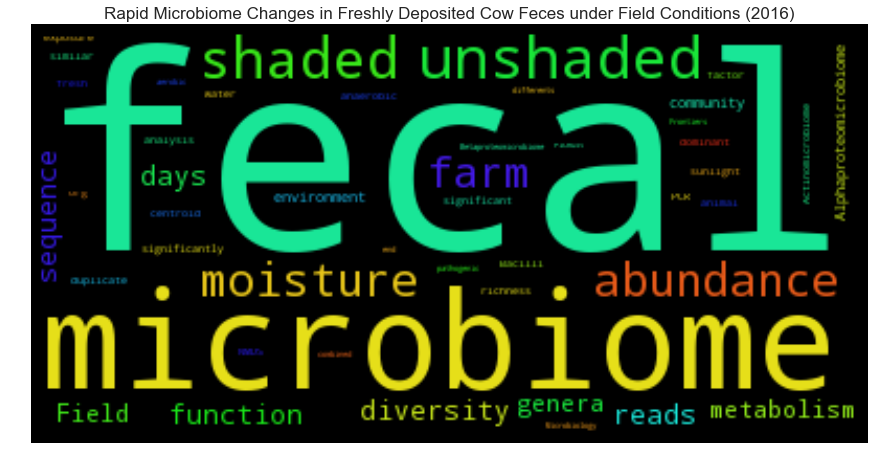

In [3]:
text2 = open('/Users/chiyuenwong/Computer_Programming/Wong_et_al_2016_Rapid_microbiome_changes_in_freshl.txt').read()
text2 = replaceText(text2)

%matplotlib inline

wc = WordCloud(max_words=1000,  stopwords=stopwords, margin=10,
               random_state=1).generate(text2)
# store default colored image
default_colors = wc.to_array()
plt.figure(figsize=(15, 15))
plt.imshow(default_colors, interpolation="bilinear")
plt.title("Rapid Microbiome Changes in Freshly Deposited Cow Feces under Field Conditions (2016)", fontsize=17)
plt.axis("off")
plt.show()

** Load the dataset and rename all samples to have the same format (e.g. G1-16S-2) **

In [4]:
df = pd.read_csv('/Users/chiyuenwong/Computer_Programming/otu_table_L3.csv', sep = "\t")
df.columns = df.columns.str.replace('\.S\d\d?\d?\.L\d\d\d\.', '')
df.columns.values[113] = 'G1.6S.15'
df.columns = df.columns.str.replace('\.', '-')
print(df.shape)
df.head()

(45, 120)


,Taxon,G1-16S-15,G1-16S-2,G3-13S-57,G3-14S-57,G1-16S-29,G1-16S-57,G1-3U-15,G1-6S-57,G2-10S-22,...,G3-15U-29,G3-15U-15,G3-13S-2,G1-6S-15,G2-19U-43,G2-19U-6,G3-15U-22,G3-18U-15,G1-3U-57,G2-9U-2
0,Archaea;Euryarchaeota;Methanobacteria,0.0,0.000047,0.0,0.000017,0.0,0.000045,0.0,0.0,0.0,...,0.0,0.000084,0.002896,0.0,0.0,0.0,0.0,0.000114,0.0,0.0
1,Archaea;Euryarchaeota;Methanomicrobia,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000056,0.000075,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Archaea;Euryarchaeota;Other,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Archaea;Other;Other,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Bacteria;Acidobacteria;Acidobacteria_Gp10,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [5]:
df.index = df['Taxon'] # make Taxon column to be dataframe index
df = df[natsorted(df.columns.values)] #sort column name
df.drop(labels=['Taxon'], axis=1,inplace = True) #remove Taxon column

# Exploratory data analysis

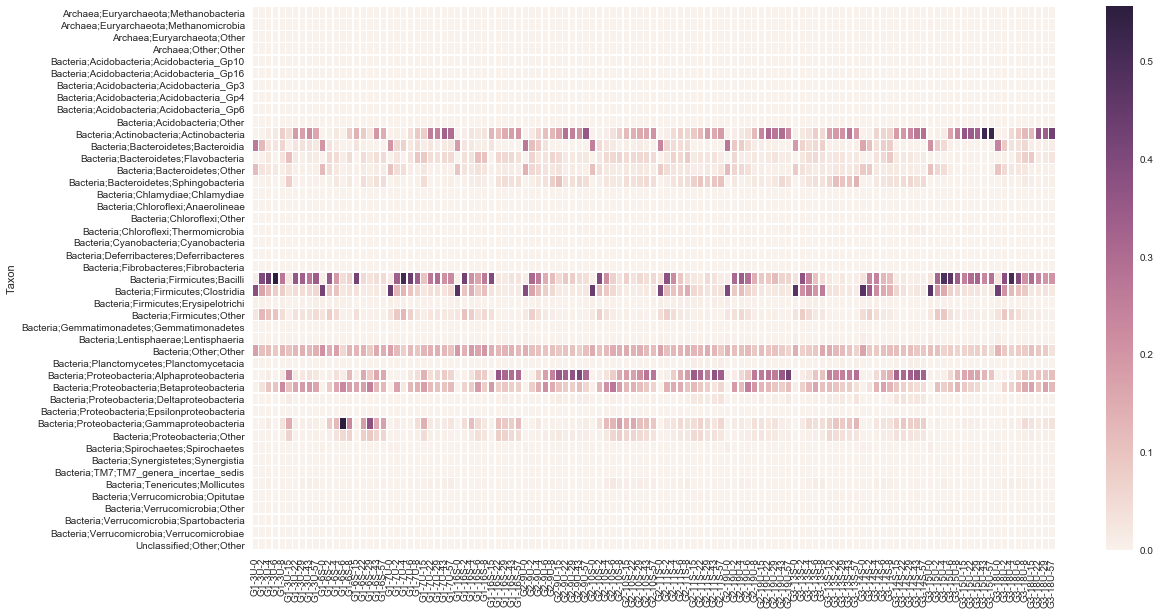

In [6]:
# create a heatmap based on the abundance of all bacteria
fig, ax = plt.subplots(figsize=(18,10))  
sns.heatmap(df, linewidths=.5, ax=ax)

** Since so many bacteria have very low abundance, only the bacteria have more than one percent are kept for further analysis **

In [7]:
#select bacteria only have abundance greater than 1 percent
df = df[df.sum(axis=1).sort_values(ascending=False)/sum(df.sum(axis=1).sort_values(ascending=False))*100 > 1]
df.shape

(13, 119)

In [8]:
#create new row that is the sum of the abundance of elimnated bacteria
Other_bacteria = (1-df.ix[:,0:].sum(axis=0).values).tolist()
df = df.append(pd.DataFrame([Other_bacteria], columns=df.columns),ignore_index=False)
new_index = ['Actinobacteria', 'Bacteroidia', 'Flavobacteria', 'Other_Bacteroidetes', 'Sphingobacteria',
             'Bacilli', 'Clostridia', 'Other_Firmicutes', 'Unassigned_bacteria', 'Alphaproteobacteria',
             'Betaproteobacteria', 'Gammaproteobacteria', 'Other_Proteobacteria', 'Other_bacteria']
df.index = new_index
df.tail()

,G1-3U-0,G1-3U-2,G1-3U-4,G1-3U-6,G1-3U-8,G1-3U-15,G1-3U-22,G1-3U-29,G1-3U-43,G1-3U-57,...,G3-15U-57,G3-18U-0,G3-18U-2,G3-18U-4,G3-18U-6,G3-18U-8,G3-18U-15,G3-18U-22,G3-18U-29,G3-18U-57
Alphaproteobacteria,0.001379,0.001252,0.009980,0.000181,0.023281,0.240200,0.018927,0.021106,0.030537,0.022933,...,0.099701,0.000867,0.002983,0.012796,0.054210,0.096736,0.089223,0.101298,0.095946,0.107207
Betaproteobacteria,0.002812,0.033887,0.094478,0.098395,0.225199,0.102481,0.163590,0.187197,0.189897,0.162980,...,0.007819,0.003208,0.057589,0.071515,0.106922,0.152586,0.169227,0.109893,0.169964,0.121459
Gammaproteobacteria,0.000551,0.000751,0.014263,0.000090,0.033462,0.147922,0.007864,0.007047,0.009760,0.008154,...,0.001176,0.000000,0.006080,0.008593,0.009409,0.047755,0.034597,0.019034,0.027389,0.030386
Other_Proteobacteria,0.000165,0.000167,0.003368,0.000271,0.008027,0.065776,0.003932,0.003854,0.003596,0.005504,...,0.000181,0.000520,0.000918,0.000778,0.006219,0.008058,0.015022,0.005994,0.006427,0.005735
Other_bacteria,0.012738,0.009098,0.010396,0.003751,0.010598,0.020628,0.004020,0.011195,0.013813,0.014270,...,0.004395,0.025056,0.017322,0.015349,0.012079,0.010175,0.010129,0.008167,0.007267,0.004750


In [9]:
#Change samples due to labeling when the experiments were conducted
df['new_G1-7U-15']=df['G1-16S-15']
df['new_G1-3U-15']=df['G1-6S-15']
df['new_G1-6S-15']=df['G1-3U-15']
df['new_G1-16S-15']=df['G1-7U-15']
df['new_G1-16S-8']=df['G1-16S-6']
df['new_G1-16S-6']=df['G1-16S-8']
df['new_G1-6S-29']=df['G1-6S-8']
df['new_G1-6S-8']=df['G1-6S-29']

df = df.drop(['G1-16S-15', 'G1-6S-15', 'G1-3U-15', 'G1-7U-15', 'G1-16S-6','G1-16S-8', 'G1-6S-8',
              'G1-6S-29'], 1)

df.columns = df.columns.str.replace('new_', '')
df = df[natsorted(df.columns.values)]

In [10]:
#Transpose the data and reorder the bacteria sequence
df2 = df
df2=df2.transpose()
df2 = df2[['Actinobacteria', 'Alphaproteobacteria', 'Betaproteobacteria', 'Gammaproteobacteria', 
           'Other_Proteobacteria', 'Bacteroidia', 'Sphingobacteria','Flavobacteria', 
           'Other_Bacteroidetes', 'Bacilli', 'Clostridia', 'Other_Firmicutes',
           'Other_bacteria', 'Unassigned_bacteria']]

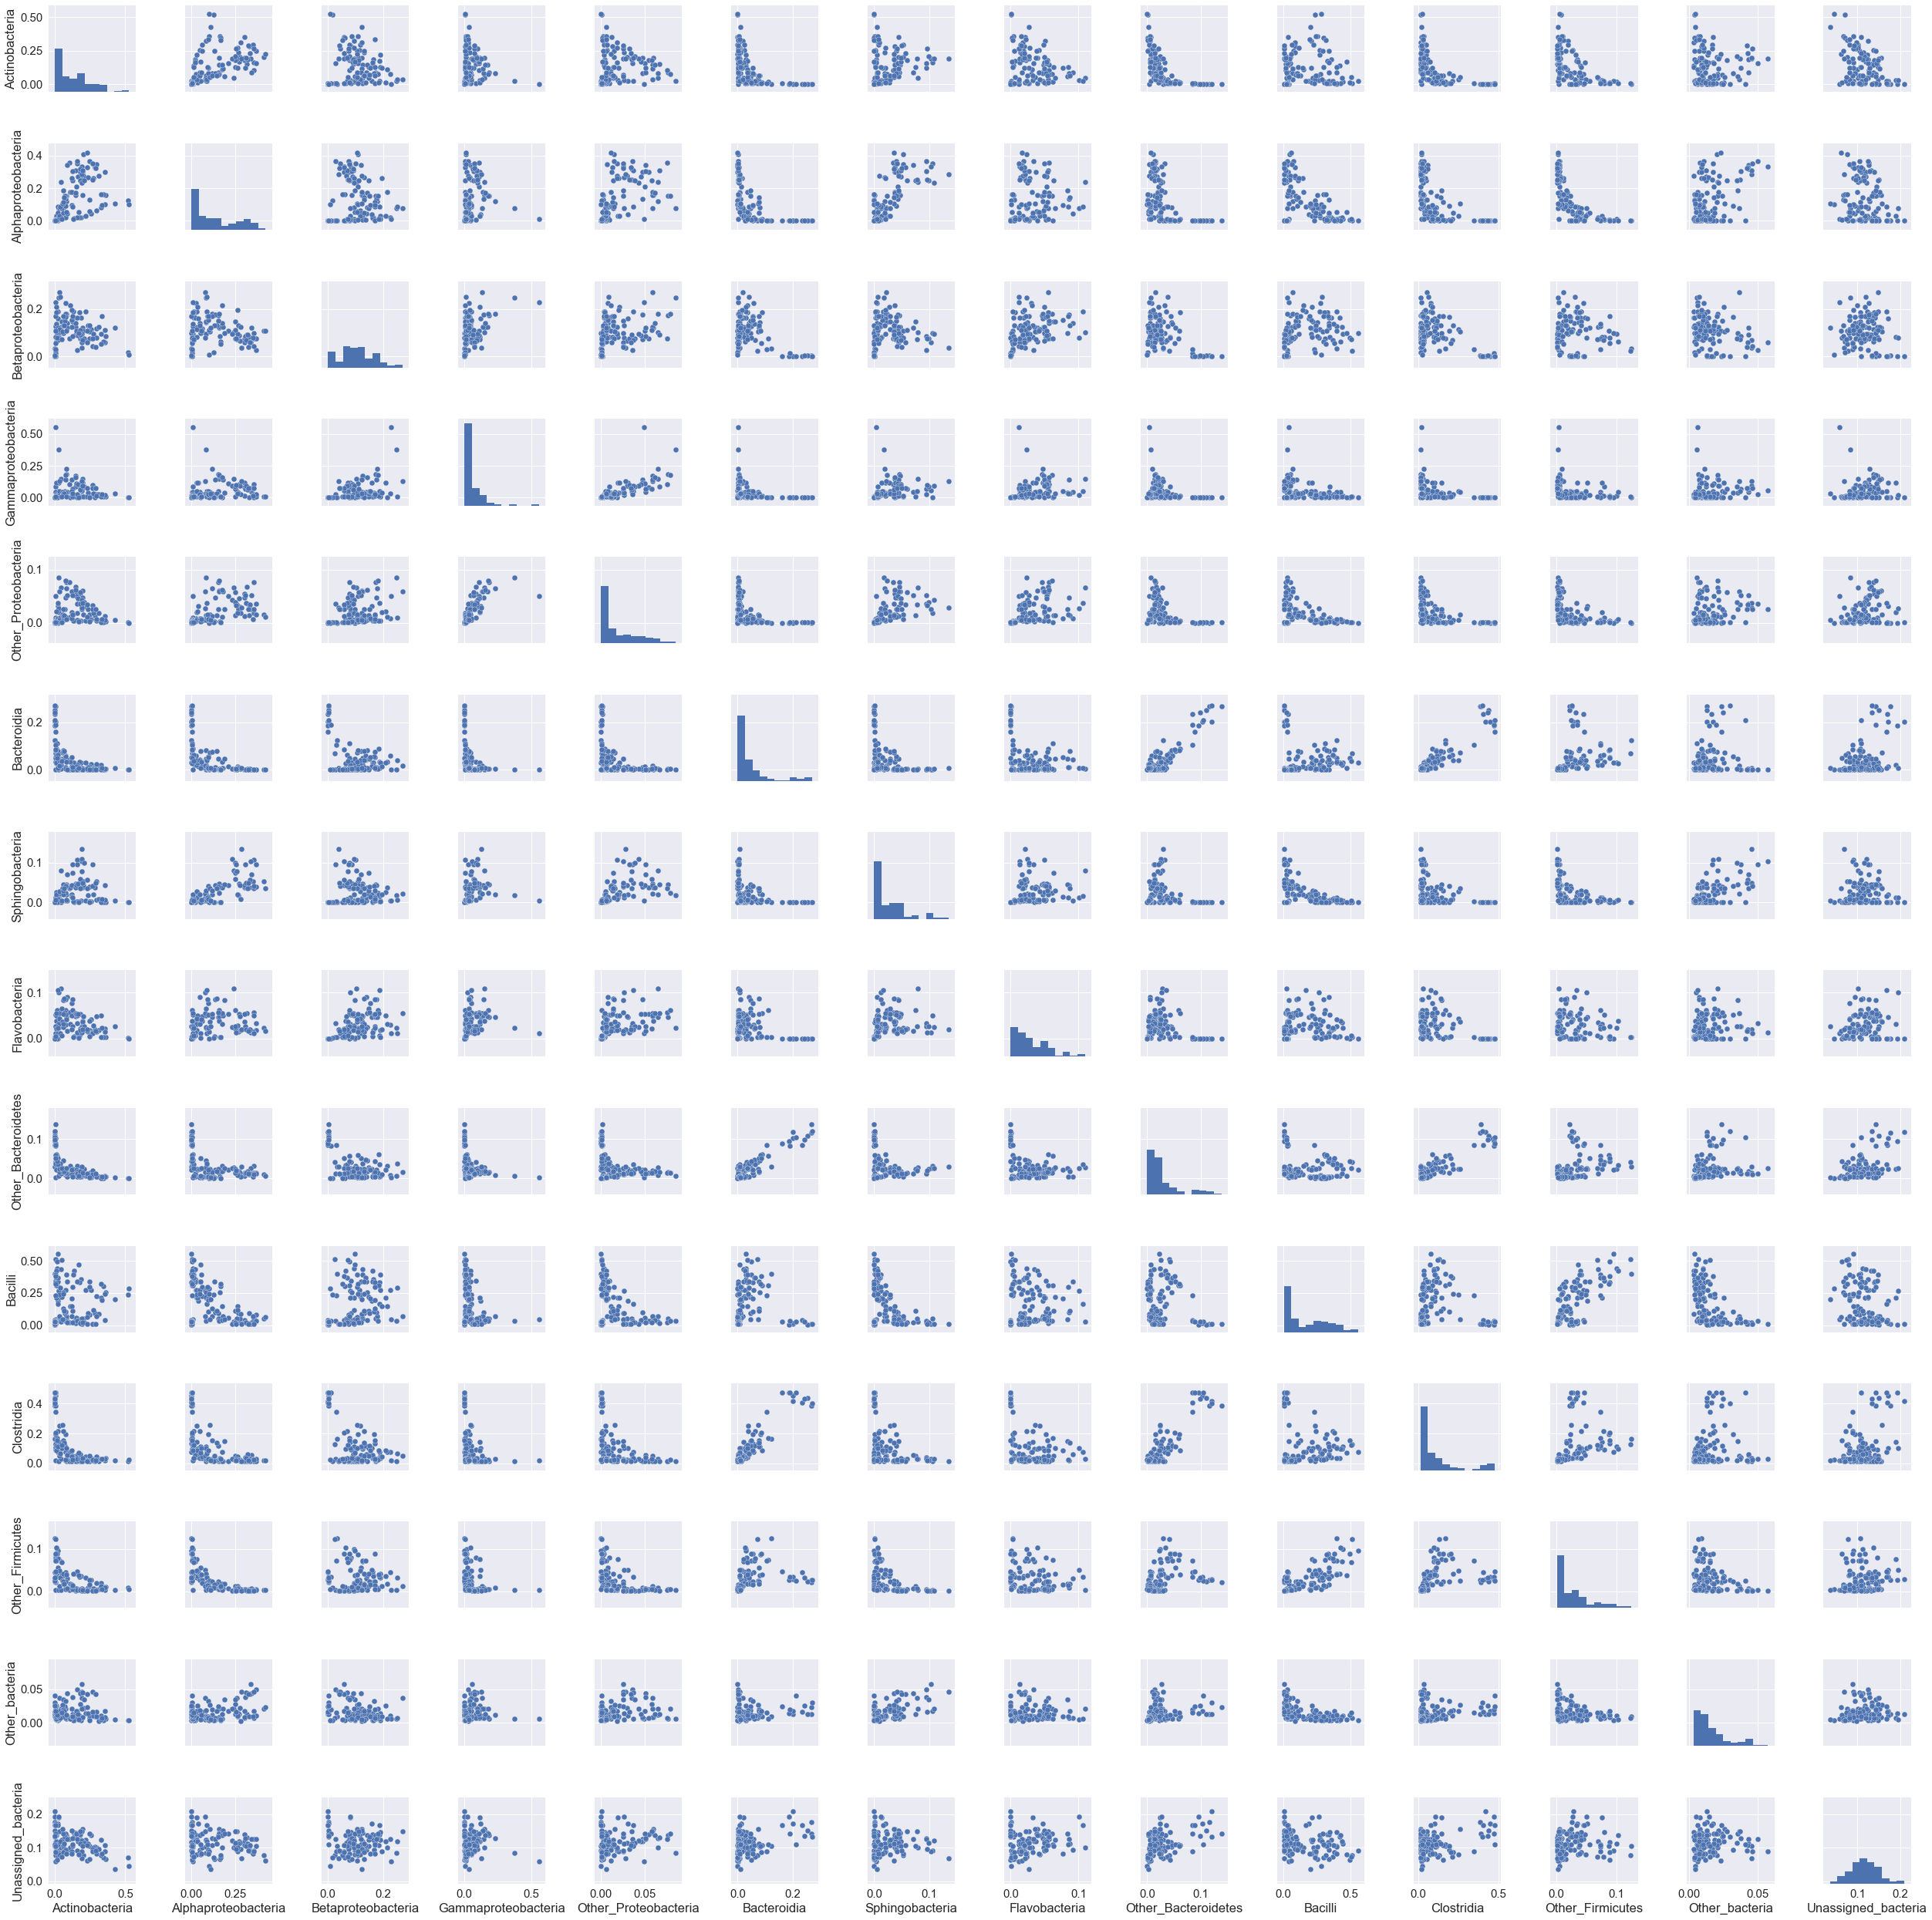

In [11]:
#Create a pairplot to look at the correlation bewteen bacteria
sns.set(font_scale=1.5)
sns.pairplot(df2)

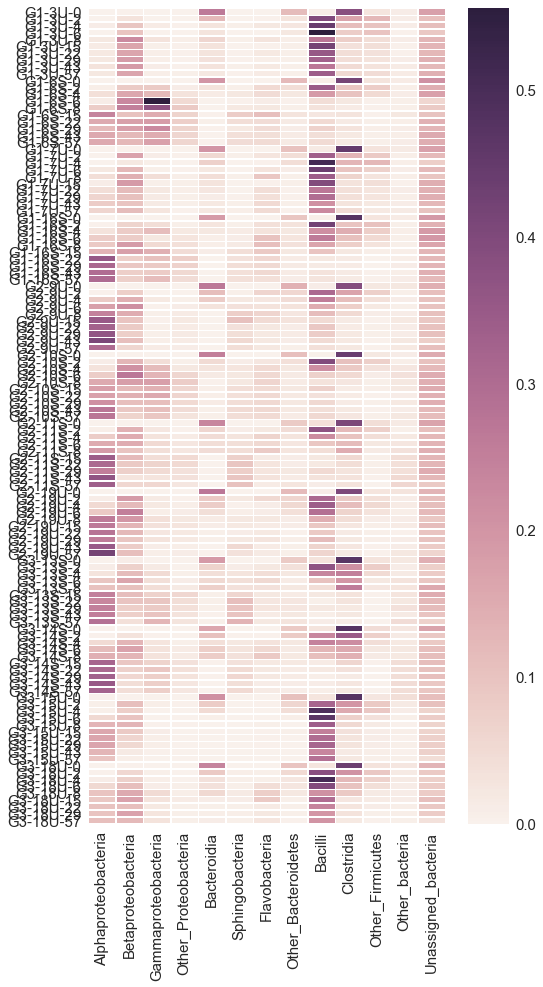

In [12]:
#Heatmap to get an overview of filtered bacteria abundance

fig, ax = plt.subplots(figsize=(8,15))  
sns.heatmap(df2.iloc[:, 1:], linewidths=.5, ax=ax)

In [13]:
#Creat column that will be used to catagorize the sample such as by sampling day, group (different farms),
#sun-exposure (shaded vs. unshaded)

df2['sample'] = df2.index.str.extract('(G[0-9]-\d\d?\D)')
df2['day'] = df2.index.str.extract('(\d?\d$)')
df2['group'] = df2.index.str.extract('(G\d)')
df2['shade'] = df2['sample'].str.extract('(\D$)')
df2['day'] = pd.to_numeric(df2['day'], errors='coerce')

# Visualization the abundance by stacked bar graph

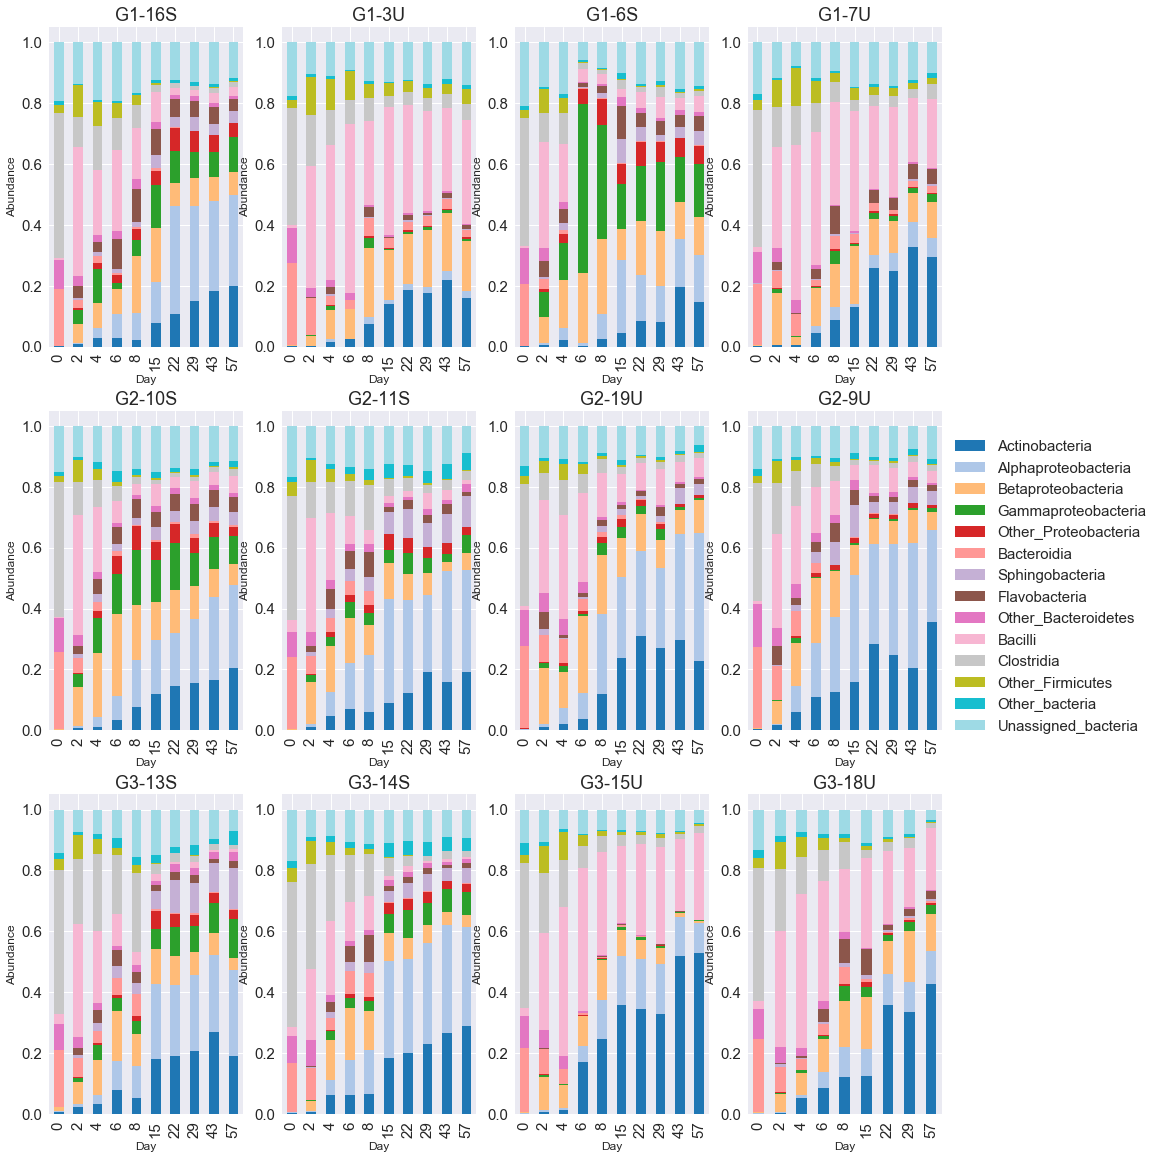

In [14]:
#plot bargraph for each sample
grouped = df2.groupby('sample')

fig1 = plt.figure()
chrt = 0


for group_name, group in grouped:
    chrt += 1 
    ax = fig1.add_subplot(3,4, chrt)
    
    if chrt < 12:
        group.index = [0, 2, 4, 6, 8, 15, 22, 29, 43, 57]
    else:
        group.index = [0, 2, 4, 6, 8, 15, 22, 29, 57] #the last sample has only 9 sampling dates
    
    aex = group.iloc[0:119:,0:14].plot(kind='bar', stacked=True, ax=ax, colormap='tab20', 
                                       title = group_name, figsize=(16, 20),legend = False)
    
    aex.set_xlabel("Day", fontsize=12)
    aex.set_ylabel("Abundance", fontsize=12)
    
    #print(group)
    
aex.legend(loc='center left', bbox_to_anchor=(1.0, 1.65))

# PCA analysis

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#Create a function to set period for sample with different sampling days

def set_period(data, period):
    data.loc[data['day'] == 0, 'period'] = '0'
    data.loc[(data['day'] > 0) & (data['day'] <= period[0]), 'period'] = '1'
    data.loc[(data['day'] > period[0]) & (data['day'] <= period[1]), 'period'] = '2'
    data.loc[(data['day'] > period[1]) & (data['day'] <= 57), 'period'] = '3'
    return data

In [17]:
#set four different periods(day 0 =0, day2-8= 1, day 15-29 = 3, day 43-57 = 4)
df3 = set_period(data=df2, period = [8, 29])

In [18]:
df4 = df3.iloc[0:119:,0:14]
scaler = StandardScaler()
scaler.fit(df4)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_data = scaler.transform(df4)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
x_pca = pca.transform(scaled_data)

In [22]:
scaled_data.shape

(119, 14)

In [23]:
x_pca.shape

(119, 2)

In [24]:
def pca_manure(data, factor):
    colors = ['Black', 'Purple', 'Blue', 'Green', 'Orange', 'Red', 'Grey', 'Pink', 'navy', 'turquoise']
    f = data[factor].unique().tolist()
    target_names=data[factor].unique()

    plt.figure(figsize=(7,5))
    for color, i, target_name in zip(colors, f, target_names):
        plt.scatter(x_pca[data[factor] == i, 0], x_pca[data[factor] == i, 1], color=color, alpha=.8, lw=2,
                    label=target_name)
    legend = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, title=factor)
    legend.get_title().set_fontsize('16')
    plt.title('PCA Plot')
    plt.show()

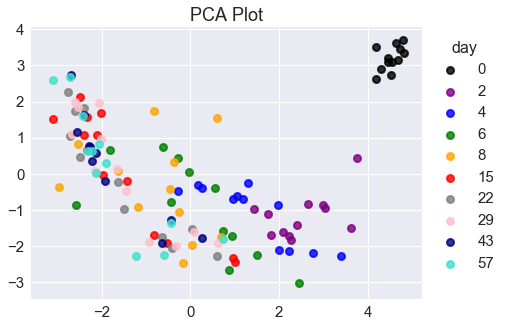

None


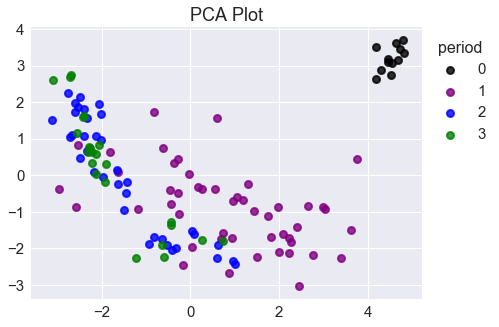

None


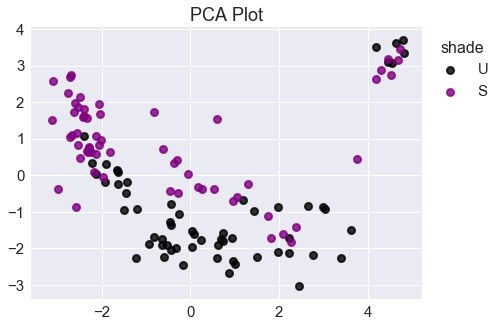

None


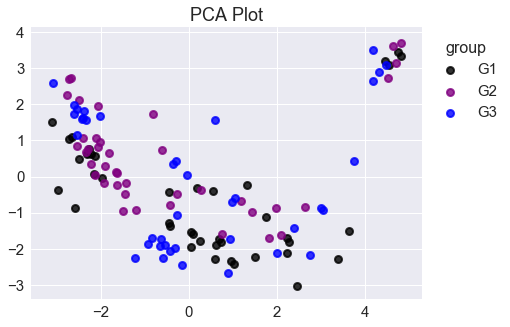

None


In [25]:
print(pca_manure(data=df3, factor='day'))
print(pca_manure(data=df3, factor='period'))
print(pca_manure(data=df3, factor='shade'))
print(pca_manure(data=df3, factor='group'))

** Because the data seem divided in the period and shade plot, Decision Tree will be used to create the classification model to predict the period and shade based on the microbiome data ** 

# Decision Tree Analysis

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

** \*\* Decision Tree analysis for period \*\* **

In [27]:
X_data = df4
y_data = df3['period']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)

In [29]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


In [30]:
rfc_pred = clf.predict(X_test)

In [31]:
print('Confusion_matrix')
print(confusion_matrix(y_test,rfc_pred))

Confusion_matrix
[[5 0 0 0]
 [0 9 2 1]
 [0 0 7 0]
 [0 0 2 4]]


In [32]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      0.75      0.86        12
          2       0.64      1.00      0.78         7
          3       0.80      0.67      0.73         6

avg / total       0.88      0.83      0.84        30



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

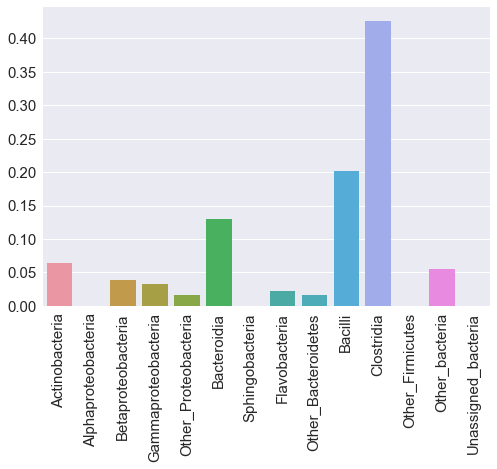

In [33]:
importances = clf.feature_importances_
sns.barplot(x=df4.columns, y=importances)
plt.xticks(rotation=90)

** \*\* Decision tree analysis for shade \*\* **

In [34]:
df5 = df3.loc[df3['day'] != 0] #remove day 0 data for this analysis
df6 = df5.iloc[:,0:14]

In [35]:
X_data2 = df6
y_data2 = df5['shade']

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, random_state=0)

In [37]:
clf2 = DecisionTreeClassifier().fit(X_train2, y_train2)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train2, y_train2)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test2, y_test2)))

Accuracy of Decision Tree classifier on training set: 0.00
Accuracy of Decision Tree classifier on test set: 0.00


In [38]:
rfc_pred2 = clf2.predict(X_test2)
print(confusion_matrix(y_test2,rfc_pred2))
print(classification_report(y_test2,rfc_pred2))

[[13  1]
 [ 1 12]]
             precision    recall  f1-score   support

          S       0.93      0.93      0.93        14
          U       0.92      0.92      0.92        13

avg / total       0.93      0.93      0.93        27



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

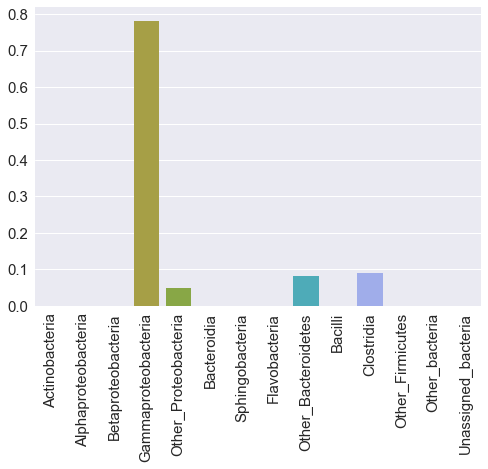

In [39]:
importances2 = clf2.feature_importances_
sns.barplot(x=df4.columns, y=importances2)
plt.xticks(rotation=90)